iter: 10 funcion objetivo = 103096.34693111936
iter: 17 funcion objetivo = 98821.84797113037
iter: 93 funcion objetivo = 98162.03144875806
iter: 172 funcion objetivo = 92384.53634444649


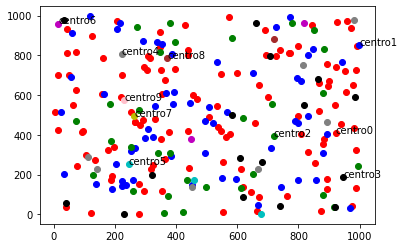

92384.53634444649


In [100]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

#Leer el archivo con los datos
datos = pd.read_csv("/Users/ivanvegagutierrez/Desktop/CIMAT/SEGUNDO/METOPT2/puntos.csv")
#Crear matriz de distancias
Dist = np.zeros((240, 240))
for i in range(240):
    for j in range(i+1, 240):
        Dist[i][j] = ((datos['x'][i]-datos['x'][j])**2 + (datos['y'][i]-datos['y'][j])**2)**0.5
        Dist[j][i] = Dist[i][j]

# Definimos la funcion objetivo
# x es un vector solucion
def fobj(x,dij):
    D = x*dij
    z = D.sum()
    return z

#Construir solucion aleatoria
def solRandom():
    # Asignamos centros de manera aleatoria
    #options = np.arange(0, 240)
    #centros = np.random.choice(options, 10, replace = False)
    centros = random.sample(range(240),10)
    # inicializamos nuestra solucion
    x = np.zeros((240, 240))
    # creamos el conjunto de puntos (los que no son centros)
    puntos = []
    for i in range(240):
        if i not in centros:
            puntos.append(i)
    puntos = np.array(puntos)
    # Creamos una diccionario que va a contener los puntos agrupados
    y = {}
    for i in range(10):
        y['centro'+ str(i)] = [centros[i]]
    # Cada centro es asignado a si mismo 
    for i in centros:
        x[i, i] = 1
    # Asignamos los puntos a los centros
    cont = 0
    puntos = set(puntos)
    for i in centros:
        asignados = []
        for j in puntos:
            x[i][j] = random.randint(0,1)
            if x[i][j] == 1:
                asignados.append(j)
                y['centro' + str(cont)].append(j)
        puntos = puntos -set(asignados)
        cont += 1
                
    '''
    for p in puntos:
        # A cada punto le asignamos un centro
        asig = distmin(p, centros, Dist)
        fila = centros[asig]
        x[fila][p] = 1
        # Agregamos el punto al centro en el vector de agrupamiento
        y['centro' + str(asig)].append(p)
    '''
    return x, y

# Busqueda aleatoria simple
def BAS(dij, N):
    iter = 0
    x = solRandom()[0]
    y = solRandom()[1]
    while iter < N:
        iter += 1
        xhat = solRandom()[0]
        if fobj(xhat, dij) < fobj(x, dij):
            #plt.pause(1)
            #plt.arrow(x[0], x[1], xhat[0]-x[0], xhat[1]-x[1], head_width=0.25)
            x = xhat
            print("iter: {} funcion objetivo = {}".format(iter, fobj(x,dij)))
    #plt.show()
    return x, fobj(x, dij), y

#Resultados
res = BAS(Dist, 1000)
fun = res[1]
dic = res[2]
# Graficar
# Vector de colores
colores = ['r', 'b', 'g', 'k', 'grey', 'c', 'm', 'y', 'brown', 'pink' ]
def graficar():
    color = 0
    etiquetas = []
    for clave in dic:
        etiquetas.append(clave)
    #Graficamos
    for clave in dic:
        for j in range(len(dic[clave])):
            punto = dic[clave][j]
            #plt.pause(.001)
            plt.scatter(datos['x'][punto], datos['y'][punto], c = colores[color])
            if j==0:
                plt.annotate(etiquetas[color], (datos['x'][punto],  datos['y'][punto]))
        color += 1
graficar()
plt.show()
print(fun)

In [84]:
random.randint(0,1)

1

In [6]:
print(Dist[99, 116])

503.491807281906
